In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
nure = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\Spreadsheets\nure.csv')
imputed = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\Spreadsheets\nure_imputed.csv')

In [132]:
nure = nure[nure['smpmedia']!='ROCK'].copy()

In [133]:
abund = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\Spreadsheets\critical_abundance.csv')

In [134]:
#gets interesting imputed samples
countsi = {}
for element in imputed.columns[1:-2]:
    try:
        sample_nums = imputed[imputed[element] > abund.loc[5][element]*5]['Unnamed: 0']
        for sample in sample_nums:
            if sample in countsi:
                countsi[sample] += 1
            else:
                countsi[sample] = 1
    except:
        pass

In [135]:
from operator import itemgetter
sorted(countsi.items(), key=itemgetter(1), reverse=True)
besti = sorted(countsi, key=countsi.get, reverse=True)[:157]

In [136]:
latsi = imputed[imputed['Unnamed: 0'].isin(besti)].latitude.values
longsi = imputed[imputed['Unnamed: 0'].isin(besti)].longitude.values

In [137]:
#get the best imputed values from the nure list
top_imputed = nure[(nure['latitude'].isin(latsi)) & (nure['longitude'].isin(longsi))].copy()
top_imputed['counts'] = pd.Series(countsi)

In [138]:
top_imputed

rec_no prime_id  replc  samptyp  rec_cnt  latitude  longitude doelab  \
190    5027327   M44551    0.0       12        1   44.1644  -110.7847   LASL   
191    5027328   M44552    0.0       12        1   44.1656  -110.7814   LASL   
192    5027329   M44553    0.0       15        1   44.1644  -110.7614   LASL   
196    5027333   M44557    0.0       12        1   44.1544  -110.7006   LASL   
200    5027337   M44561    0.0       12        1   44.1853  -110.7064   LASL   
201    5027338   M44562    0.0       12        1   44.1331  -110.7083   LASL   
216    5027353   M44577    0.0       12        1   44.0783  -110.9678   LASL   
224    5027361   M44585    0.0       12        1   44.2922  -110.5842   LASL   
225    5027362   M44586    0.0       12        1   44.2886  -110.5850   LASL   
252    5027389   M44613    0.0       12        1   44.1942  -110.9725   LASL   
253    5027390   M44614    0.0       12        1   44.1886  -110.9594   LASL   
311    5027537   M44762    0.0       12        1   44.2325  -111.0111   LASL   
345    5027576   M44802    0.0       12        1   44.6503  -110.6914   LASL   
351    5027582   M44808    0.0       12        1   44.5964  -110.7317   LASL   
363    5027596   M44822    0.0       12        1   44.7800  -111.0431   LASL   
367    5027600   M44826    0.0       12        1   44.7831  -110.9847   LASL   
375    5027608   M44834    0.0       12        1   44.8803  -110.9908   LASL   
393    5027626   M44852    0.0       12        1   44.7047  -110.9436   LASL   
408    5027641   M44867    0.0       12        1   44.7244  -110.6117   LASL   
518    5027755   M44982    0.0       12        1   44.6244  -110.2544   LASL   
752    5027989   M45216    0.0       12        1   44.2989  -110.4650   LASL   
755    5027992   M45219    0.0       12        1   44.2869  -110.4606   LASL   
757    5027994   M45221    0.0       12        1   44.2639  -110.4497   LASL   
783    5028020   M45247    0.0       12        1   44.1967  -110.4281   LASL   
1333   5042062   W00572    0.0       15        1   44.2153  -108.4397   LASL   
1381   5042110   W00622    0.0       15        1   44.2094  -108.1117   LASL   
1524   5042253   W00769    0.0       12        1   44.9022  -109.3236   LASL   
2047   5042776   W01304    0.0       12        1   44.9922  -109.4933   LASL   
2695   5043424   202029    0.0       15        1   44.1822  -107.9728   LASL   
3307   5044036   W04342    0.0       15        1   44.3166  -105.4438   LASL   
...        ...      ...    ...      ...      ...       ...        ...    ...   
13810  5100113   W15282    0.0       12        1   42.3953  -106.3442   LASL   
13921  5100224   W15404    0.0       15        1   42.0719  -106.6783   LASL   
14007  5100310   W15500    0.0       12        1   42.7433  -107.7589   LASL   
14049  5100352   W15547    0.0       15        1   42.2778  -106.0797   LASL   
14055  5100358   W15553    0.0       15        1   42.2919  -106.1103   LASL   
14062  5100365   W15560    0.0       15        1   42.3431  -106.1225   LASL   
14072  5100375   W15570    0.0       12        1   42.5164  -106.0692   LASL   
14652  5100955   W08655    0.0       15        1   43.0069  -107.6017   LASL   
15295  5101598   W09481    0.0       15        1   43.3528  -107.8836   LASL   
15494  5101797   W10295    0.0       15        1   43.3083  -104.1806   LASL   
15515  5101818   W10324    0.0       15        1   43.0825  -104.2250   LASL   
16669  5103021   W16450    0.0       12        1   42.1167  -105.6917   LASL   
16691  5103043   W16475    0.0       12        1   42.1806  -105.8639   LASL   
16711  5103063   W16503    0.0       95        1   42.3064  -105.9958   LASL   
16738  5103090   W16540    0.0       12        1   42.3083  -105.5867   LASL   
16741  5103093   W16543    0.0       12        1   42.1861  -105.6850   LASL   
16742  5103094   W16544    0.0       12        1   42.1906  -105.6864   LASL   
16767  5103119   W16587    0.0       12        1   42.3131  -105.8425   LASL   
16817  5

In [108]:
countsn = {}
for element in nure.columns[81:-8]:
    try:
        sample_nums = nure[nure[element] > abund.loc[5][element]*5].index
        for sample in sample_nums:
            if sample in countsn:
                countsn[sample] += 1
            else:
                countsn[sample] = 1
    except:
        pass

In [109]:
from operator import itemgetter
sorted(countsn.items(), key=itemgetter(1), reverse=True)
bestn = sorted(countsn, key=countsn.get, reverse=True)[:202]

In [110]:
top_nure = nure[nure.index.isin(bestn)].copy()
top_nure['counts'] = pd.Series(countsn)

In [111]:
#delete duplicates with a merge on rec_no
combined = top_imputed.merge(top_nure, how='outer', on='rec_no', indicator=True) #nure is right, imputed is left

Text(0.5, 1.0, 'IMPUTED SAMPLES OF INTEREST')

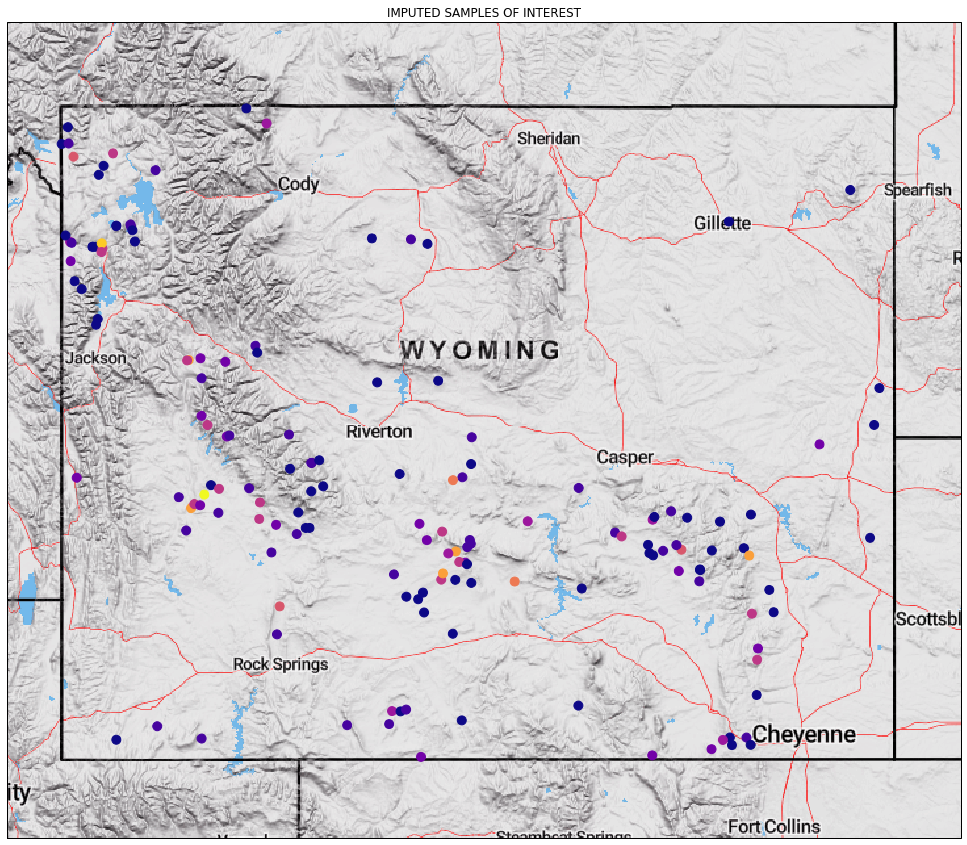

In [112]:
import cartopy
import cartopy.crs as ccrs #import the coordinate refernce system
import cartopy.io.img_tiles as cimgt #this is for calling map tiles from mapbox
mapbox = cimgt.MapboxStyleTiles('pk.eyJ1IjoiamVzc2VwaXNlbCIsImEiOiJjanN3MG43Z2wwNmFoNDNzMTJncDdqMDV0In0.LCWlSCTZwv2j-9V5o1egWw', 'jessepisel', 'cjnlyd3ll0qh42smrrbe8q8c4')
#this creates a mapbox object that has an access token, username, and a mapID, this is the basemap we are going to use underneath our plot

fig = plt.figure(figsize=(20,15)) #I like bigger figures
ax = plt.axes(projection=mapbox.crs) #this sets our plot axes to the mapbox coordinate reference system
ax.set_extent([-103.5, -111.5, 40.5, 45.5])
ax.add_image(mapbox, 7)

plt.scatter(combined.longitude_x, combined.latitude_x,s=80, transform=ccrs.Geodetic(), marker='o', c=combined.counts_x, cmap='plasma')
plt.title('IMPUTED SAMPLES OF INTEREST')



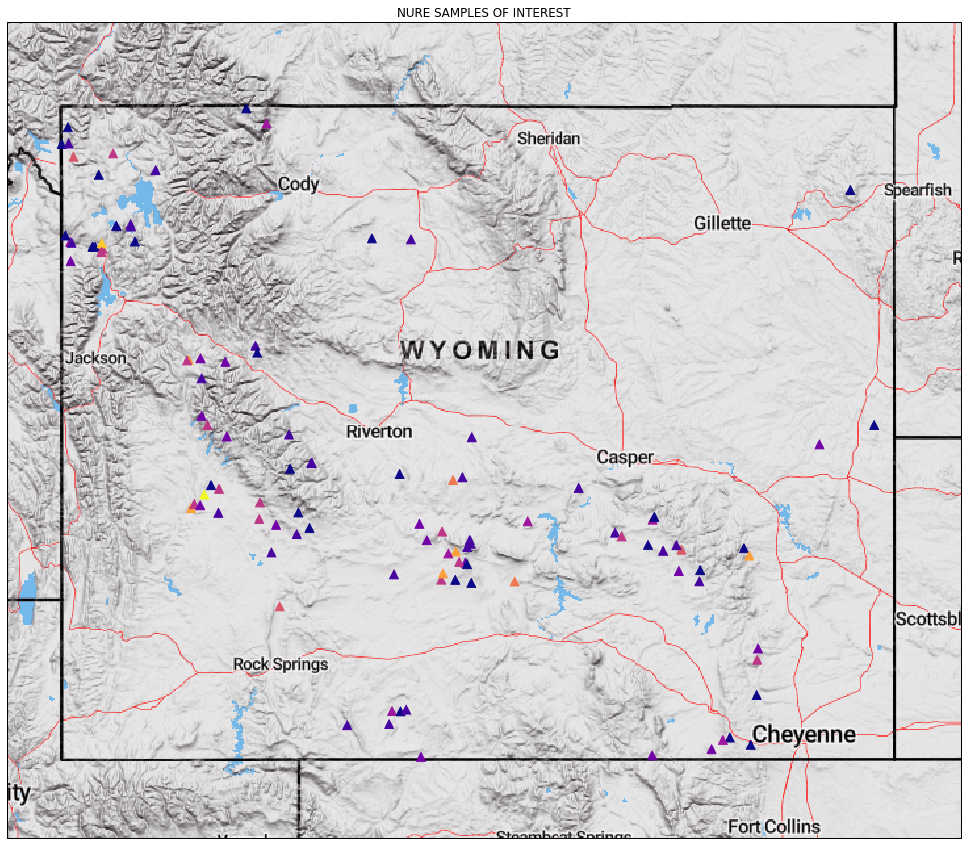

In [113]:
fig = plt.figure(figsize=(20,15)) #I like bigger figures
ax = plt.axes(projection=mapbox.crs) #this sets our plot axes to the mapbox coordinate reference system
ax.set_extent([-103.5, -111.5, 40.5, 45.5])
ax.add_image(mapbox, 7)
plt.title('NURE SAMPLES OF INTEREST')
plt.scatter(combined.longitude_y, combined.latitude_y,s=80, transform=ccrs.Geodetic(), marker ='^',c=combined.counts_x, cmap='plasma')

In [114]:
len(combined[combined._merge == 'left_only']), len(combined[combined._merge == 'right_only']), len(combined[combined._merge == 'both'])

(47, 94, 108)

This section let's go ahead and get rid of samples in national parks and wilderness areas

In [115]:
import geopandas as gpd
from shapely.geometry import Point

In [116]:
nogo = gpd.read_file(r'J:\Geology\WSGS\GIS\land ownership\forbidden_zones.shp')

In [117]:
nogo = nogo.to_crs({'init' :'epsg:4326'})

In [118]:
#create our geometry list from the imputed data
geometry = [Point(xy) for xy in zip(top_imputed.longitude, top_imputed.latitude)]
crs = {'init': 'epsg:4326'}
gdf_i = gpd.GeoDataFrame(top_imputed, crs=crs, geometry=geometry)

#create our geometry list from the nure data
geometry = [Point(xy) for xy in zip(top_nure.longitude, top_nure.latitude)]
crs = {'init': 'epsg:4326'}
gdf_n = gpd.GeoDataFrame(top_nure, crs=crs, geometry=geometry)

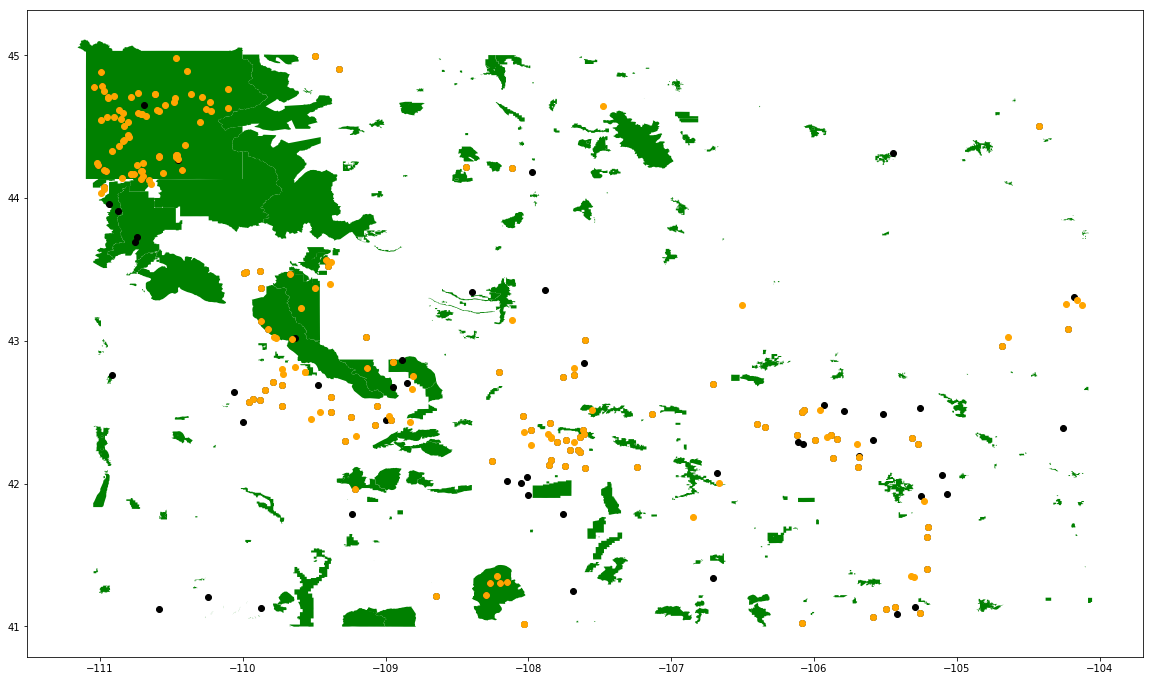

In [119]:
base = nogo.plot(color='green', figsize=(20,15))
gdf_i.plot(ax=base, color="black")
gdf_n.plot(ax=base, color='orange')

In [120]:
imputed_joined = gpd.sjoin(nogo, gdf_i, how='right')
nure_joined = gpd.sjoin(nogo, gdf_n, how='right')

In [121]:
fair_game_i = imputed_joined[~imputed_joined['Res_Name'].isin(imputed_joined['Res_Name'].unique()[:-1])]
fair_game_n = nure_joined[~nure_joined['Res_Name'].isin(nure_joined['Res_Name'].unique()[:-1])]

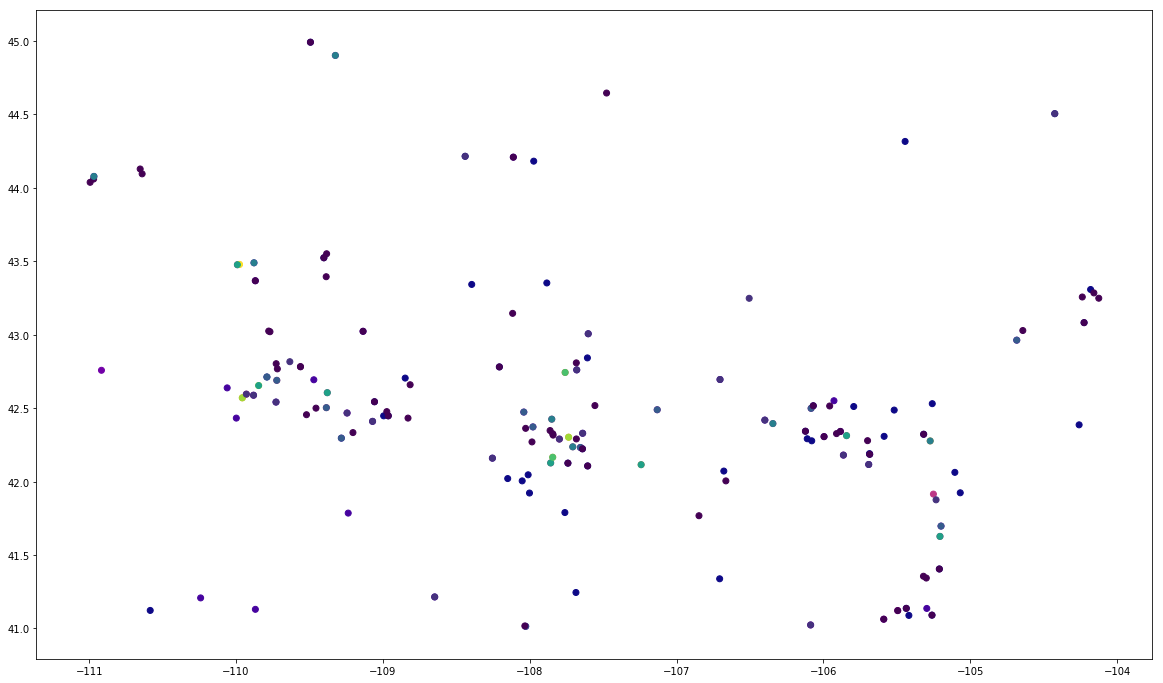

In [122]:
bottom = fair_game_i.plot(column='counts', cmap='plasma', figsize=(20,15))
fair_game_n.plot(column='counts', ax=bottom, cmap='viridis')

In [123]:
combined = fair_game_i.merge(fair_game_n, how='outer', on='rec_no', indicator=True) #nure is right, imputed is left

Text(0.5, 1.0, 'IMPUTED SAMPLES OF INTEREST')

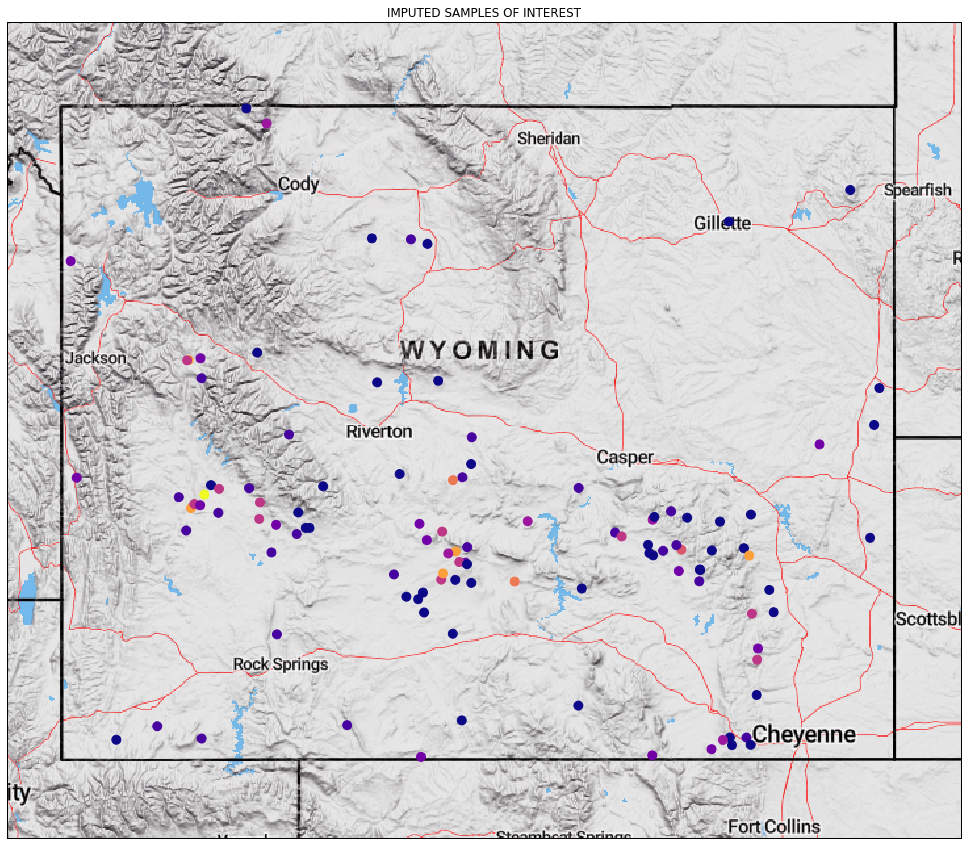

In [124]:
fig = plt.figure(figsize=(20,15)) #I like bigger figures
ax = plt.axes(projection=mapbox.crs) #this sets our plot axes to the mapbox coordinate reference system
ax.set_extent([-103.5, -111.5, 40.5, 45.5])
ax.add_image(mapbox, 7)

plt.scatter(combined.longitude_x, combined.latitude_x,s=80, transform=ccrs.Geodetic(), marker='o', c=combined.counts_x, cmap='plasma')
plt.title('IMPUTED SAMPLES OF INTEREST')

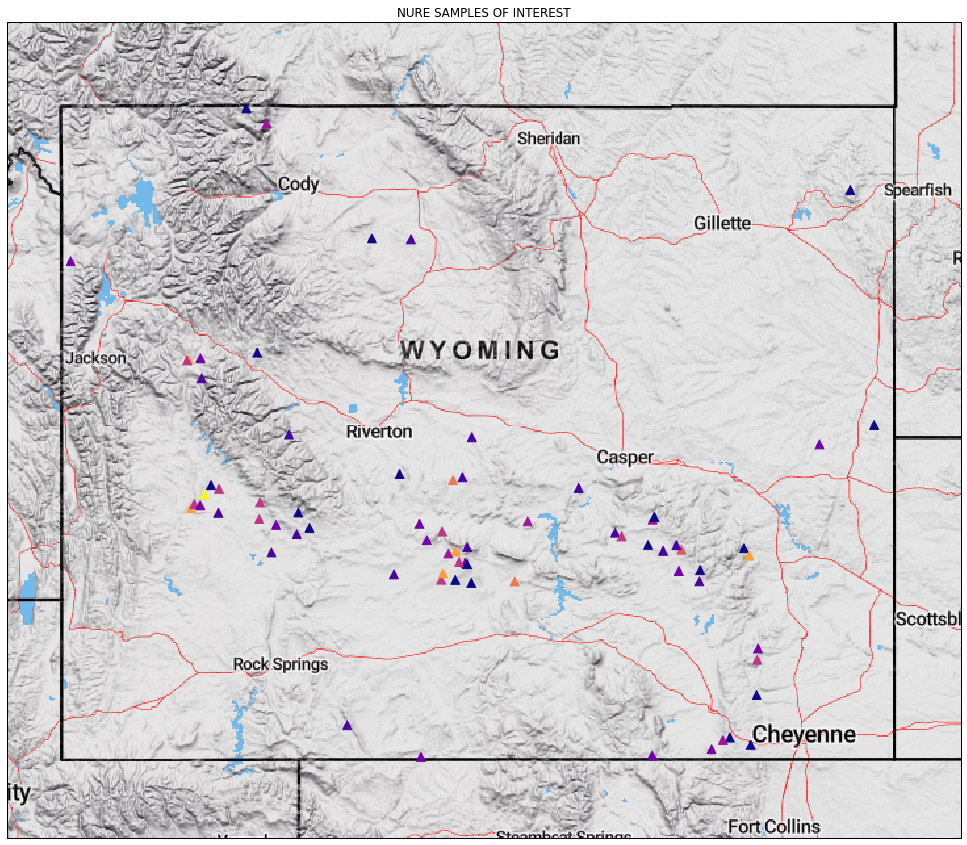

In [125]:
fig = plt.figure(figsize=(20,15)) #I like bigger figures
ax = plt.axes(projection=mapbox.crs) #this sets our plot axes to the mapbox coordinate reference system
ax.set_extent([-103.5, -111.5, 40.5, 45.5])
ax.add_image(mapbox, 7)
plt.title('NURE SAMPLES OF INTEREST')
plt.scatter(combined.longitude_y, combined.latitude_y,s=80, transform=ccrs.Geodetic(), marker ='^',c=combined.counts_x, cmap='plasma')

In [126]:
len(combined[combined._merge == 'left_only']), len(combined[combined._merge == 'right_only']), len(combined[combined._merge == 'both'])

(38, 43, 72)

In [127]:
len(combined[combined._merge == 'left_only'])+len(combined[combined._merge == 'right_only'])+len(combined[combined._merge == 'both'])

153

38 imputed, 43 nure, 72 both

In [129]:
combined.to_csv(r'I:\Current_Projects\NURE_Reprocessing\selected_samples.csv')